In [7]:
#implementing decision tree classifier algorithm on the dataset
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

def entropy(node):
    hist = np.bincount(node)
    ps = hist/len(node)
    entropy=-np.sum([p*np.log2(p) for p in ps if p>0])
    return entropy

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf(self):
        var = (self.value is None)
        return not var


def Split(X_column, split_thresh):
    return np.argwhere(X_column<=split_thresh).flatten(),np.argwhere(X_column>split_thresh).flatten()


def IG(label, X_column, split_thresh):
    parent_entropy = entropy(label)
    left_index, right_index = Split(X_column, split_thresh)
    if len(left_index)==0 or len(right_index)==0:
        return 0
    n = len(label)
    n_l, n_r = len(left_index), len(right_index)
    e_l, e_r = entropy(label[left_index]), entropy(label[right_index])
    child_entropy = (n_l/n)*e_l + (n_r/n)*e_r
    return parent_entropy - child_entropy


def best_feat_as_root(Data, label, feat_index):
    best_gain = -1
    split_idx, split_thresh = None, None
    for feat_idx in feat_index:
        X_column = Data[:, feat_idx]
        thresholds = np.unique(X_column)
        for threshold in thresholds:
            gain = IG(label, X_column, threshold)
            if gain>best_gain:
                best_gain = gain
                split_idx = feat_idx
                split_thresh = threshold
    return split_idx, split_thresh


def accuracy(y_true, y_exp):
    return np.sum(y_true == y_exp) / len(y_true)



def most_probable_label(label):
    counter = Counter(label)
    return counter.most_common(1)[0][0]



class DecisionTree:
    def __init__(self):
        self.min_split = 2
        self.max_depth = 4
        self.n_feats = 0 
        self.root = None
        self.feat_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
        self.feat_index=[0,1,2,3]
        self.labels=['setosa', 'versicolor', 'virginica']
    def fit(self, feat, label):
        self.n_feats = feat.shape[1] if not self.n_feats else min(self.n_feats, feat.shape[1])
        self.root = self.div_node(feat, label)
    def predict(self, feat):
        return np.array([self.formed_tree(x, self.root) for x in feat])
    def div_node(self, feat, exp, depth=0):
        n_samples, n_features = feat.shape
        n_labels = len(np.unique(exp))

        if depth>=self.max_depth or n_labels==1 or n_samples<self.min_split:
            leaf_value = most_probable_label(exp)
            return Node(value=leaf_value)

        feat_index = np.random.choice(n_features, self.n_feats, replace=False)
        self.feat_index=feat_index
        best_feat, best_thresh = best_feat_as_root(feat, exp, feat_index)

        left_index, right_index = Split(feat[:, best_feat], best_thresh)

        left = self.div_node(feat[left_index, :], exp[left_index], depth + 1)
        right = self.div_node(feat[right_index, :], exp[right_index], depth + 1)

        return Node(best_feat, best_thresh, left, right)
    def formed_tree(self, x, node):

        if node.is_leaf():
            return node.value
        if x[node.feature]<=node.threshold:
            return self.formed_tree(x, node.left)
        return self.formed_tree(x, node.right)
    #print the tree
    def print_tree(self):
        self.traverse_node(self.root)
    def traverse_node(self, node, spacing="|"):
        if node.is_leaf():
            print(spacing+"Predict", self.labels[node.value])
            return
        print(spacing+"If "+self.feat_names[node.feature]+"<="+str(node.threshold)+":")
        self.traverse_node(node.left, spacing + "|")
        print(spacing+"Else:")
        self.traverse_node(node.right, spacing + "|")

if __name__=='__main__':
    data = load_iris()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    #Decision tree of X_train and y_train, i.e. training data
    clf = DecisionTree()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy(y_test, y_pred)
    print("Accuracy:", acc*100 ,"%")
    clf.print_tree()
    print("Feature index:",[data.feature_names[i] for i in clf.feat_index])
    print("Labels:",data.target_names)

Accuracy: 100.0 %
|If petal length (cm)<=1.9:
||Predict setosa
|Else:
||If petal width (cm)<=1.7:
|||If petal length (cm)<=4.9:
||||If petal width (cm)<=1.6:
|||||Predict versicolor
||||Else:
|||||Predict virginica
|||Else:
||||If petal width (cm)<=1.5:
|||||Predict virginica
||||Else:
|||||Predict versicolor
||Else:
|||If petal length (cm)<=4.8:
||||If sepal length (cm)<=5.9:
|||||Predict versicolor
||||Else:
|||||Predict virginica
|||Else:
||||Predict virginica
Feature index: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']
Labels: ['setosa' 'versicolor' 'virginica']


In [8]:
clf2 = DecisionTree()
clf2.fit(X, y)    
clf2.print_tree()

|If petal width (cm)<=0.6:
||Predict setosa
|Else:
||If petal width (cm)<=1.7:
|||If petal length (cm)<=4.9:
||||If petal width (cm)<=1.6:
|||||Predict versicolor
||||Else:
|||||Predict virginica
|||Else:
||||If petal width (cm)<=1.5:
|||||Predict virginica
||||Else:
|||||Predict versicolor
||Else:
|||If petal length (cm)<=4.8:
||||If sepal length (cm)<=5.9:
|||||Predict versicolor
||||Else:
|||||Predict virginica
|||Else:
||||Predict virginica


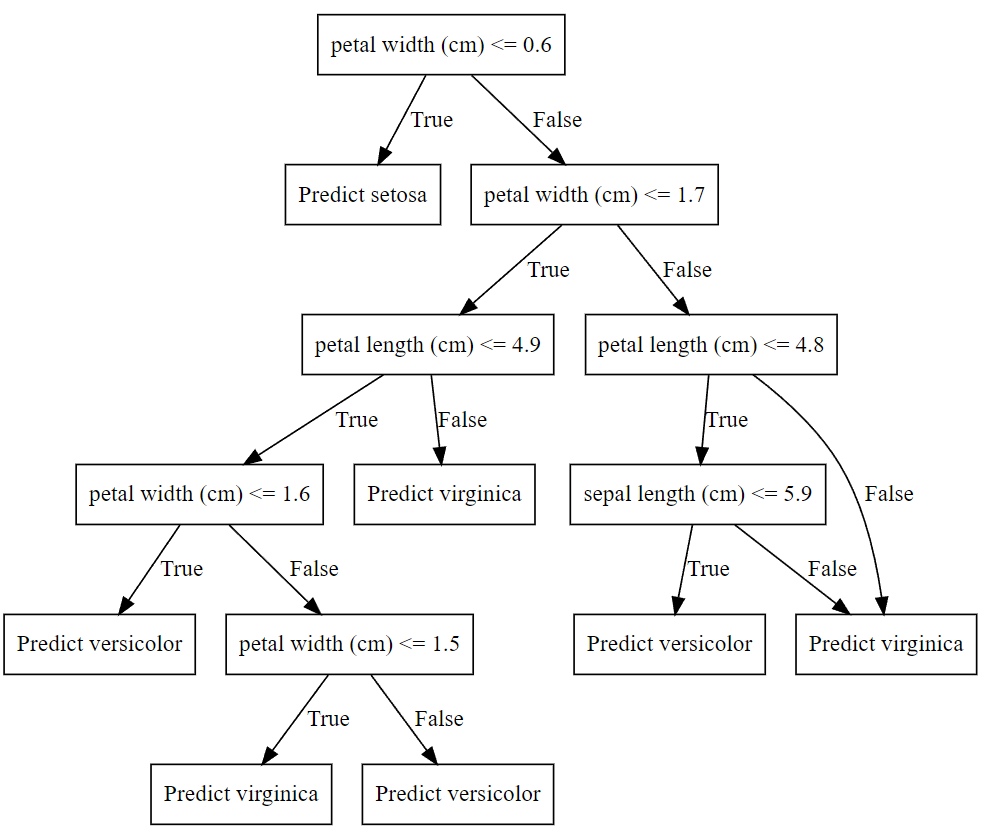